# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Import the Necessary Packages

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

!pip -q install ./python

from unityagents import UnityEnvironment

%matplotlib inline

plt.ion()

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

### 2. Instantiate the Environment

In [2]:
# please do not modify the line below
env = UnityEnvironment(file_name="data/Banana.x86_64")


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### 3. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# number of actions
action_size = brain.vector_action_space_size

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# examine the state space 
state = env_info.vector_observations[0]
state_size = len(state)

### 4. Define dqn function with default hyper parameters

In [4]:
def dqn(agent, env, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]  
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            #break
    return scores

### 5. Train the Agent with DQN

In [5]:
from dqn_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, seed=0)

scores = dqn(agent, env, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995)

Episode 100	Average Score: 1.00
Episode 200	Average Score: 4.52
Episode 300	Average Score: 8.26
Episode 400	Average Score: 9.80
Episode 500	Average Score: 11.98
Episode 600	Average Score: 13.07
Episode 700	Average Score: 14.77
Episode 740	Average Score: 15.01
Environment solved in 640 episodes!	Average Score: 15.01
Episode 742	Average Score: 15.07
Environment solved in 642 episodes!	Average Score: 15.07
Episode 750	Average Score: 15.03
Environment solved in 650 episodes!	Average Score: 15.03
Episode 751	Average Score: 15.08
Environment solved in 651 episodes!	Average Score: 15.08
Episode 752	Average Score: 15.07
Environment solved in 652 episodes!	Average Score: 15.07
Episode 753	Average Score: 15.06
Environment solved in 653 episodes!	Average Score: 15.06
Episode 754	Average Score: 15.07
Environment solved in 654 episodes!	Average Score: 15.07
Episode 757	Average Score: 15.02
Environment solved in 657 episodes!	Average Score: 15.02
Episode 759	Average Score: 15.02
Environment solved i

Episode 840	Average Score: 15.52
Environment solved in 740 episodes!	Average Score: 15.52
Episode 841	Average Score: 15.64
Environment solved in 741 episodes!	Average Score: 15.64
Episode 842	Average Score: 15.64
Environment solved in 742 episodes!	Average Score: 15.64
Episode 843	Average Score: 15.76
Environment solved in 743 episodes!	Average Score: 15.76
Episode 844	Average Score: 15.75
Environment solved in 744 episodes!	Average Score: 15.75
Episode 845	Average Score: 15.84
Environment solved in 745 episodes!	Average Score: 15.84
Episode 846	Average Score: 15.82
Environment solved in 746 episodes!	Average Score: 15.82
Episode 847	Average Score: 15.85
Environment solved in 747 episodes!	Average Score: 15.85
Episode 848	Average Score: 15.86
Environment solved in 748 episodes!	Average Score: 15.86
Episode 849	Average Score: 15.86
Environment solved in 749 episodes!	Average Score: 15.86
Episode 850	Average Score: 15.86
Environment solved in 750 episodes!	Average Score: 15.86
Episode 85

Episode 932	Average Score: 16.11
Environment solved in 832 episodes!	Average Score: 16.11
Episode 933	Average Score: 16.10
Environment solved in 833 episodes!	Average Score: 16.10
Episode 934	Average Score: 16.11
Environment solved in 834 episodes!	Average Score: 16.11
Episode 935	Average Score: 16.14
Environment solved in 835 episodes!	Average Score: 16.14
Episode 936	Average Score: 16.15
Environment solved in 836 episodes!	Average Score: 16.15
Episode 937	Average Score: 16.11
Environment solved in 837 episodes!	Average Score: 16.11
Episode 938	Average Score: 16.11
Environment solved in 838 episodes!	Average Score: 16.11
Episode 939	Average Score: 16.21
Environment solved in 839 episodes!	Average Score: 16.21
Episode 940	Average Score: 16.21
Environment solved in 840 episodes!	Average Score: 16.21
Episode 941	Average Score: 16.18
Environment solved in 841 episodes!	Average Score: 16.18
Episode 942	Average Score: 16.13
Environment solved in 842 episodes!	Average Score: 16.13
Episode 94

Episode 1023	Average Score: 15.83
Environment solved in 923 episodes!	Average Score: 15.83
Episode 1024	Average Score: 15.82
Environment solved in 924 episodes!	Average Score: 15.82
Episode 1025	Average Score: 15.86
Environment solved in 925 episodes!	Average Score: 15.86
Episode 1026	Average Score: 15.90
Environment solved in 926 episodes!	Average Score: 15.90
Episode 1027	Average Score: 15.92
Environment solved in 927 episodes!	Average Score: 15.92
Episode 1028	Average Score: 15.92
Environment solved in 928 episodes!	Average Score: 15.92
Episode 1029	Average Score: 15.86
Environment solved in 929 episodes!	Average Score: 15.86
Episode 1030	Average Score: 15.91
Environment solved in 930 episodes!	Average Score: 15.91
Episode 1031	Average Score: 15.88
Environment solved in 931 episodes!	Average Score: 15.88
Episode 1032	Average Score: 15.89
Environment solved in 932 episodes!	Average Score: 15.89
Episode 1033	Average Score: 15.81
Environment solved in 933 episodes!	Average Score: 15.81

Episode 1113	Average Score: 15.66
Environment solved in 1013 episodes!	Average Score: 15.66
Episode 1114	Average Score: 15.63
Environment solved in 1014 episodes!	Average Score: 15.63
Episode 1115	Average Score: 15.67
Environment solved in 1015 episodes!	Average Score: 15.67
Episode 1116	Average Score: 15.81
Environment solved in 1016 episodes!	Average Score: 15.81
Episode 1117	Average Score: 15.82
Environment solved in 1017 episodes!	Average Score: 15.82
Episode 1118	Average Score: 15.72
Environment solved in 1018 episodes!	Average Score: 15.72
Episode 1119	Average Score: 15.62
Environment solved in 1019 episodes!	Average Score: 15.62
Episode 1120	Average Score: 15.56
Environment solved in 1020 episodes!	Average Score: 15.56
Episode 1121	Average Score: 15.62
Environment solved in 1021 episodes!	Average Score: 15.62
Episode 1122	Average Score: 15.71
Environment solved in 1022 episodes!	Average Score: 15.71
Episode 1123	Average Score: 15.66
Environment solved in 1023 episodes!	Average S

Episode 1203	Average Score: 15.72
Environment solved in 1103 episodes!	Average Score: 15.72
Episode 1204	Average Score: 15.72
Environment solved in 1104 episodes!	Average Score: 15.72
Episode 1205	Average Score: 15.71
Environment solved in 1105 episodes!	Average Score: 15.71
Episode 1206	Average Score: 15.71
Environment solved in 1106 episodes!	Average Score: 15.71
Episode 1207	Average Score: 15.70
Environment solved in 1107 episodes!	Average Score: 15.70
Episode 1208	Average Score: 15.66
Environment solved in 1108 episodes!	Average Score: 15.66
Episode 1209	Average Score: 15.81
Environment solved in 1109 episodes!	Average Score: 15.81
Episode 1210	Average Score: 15.76
Environment solved in 1110 episodes!	Average Score: 15.76
Episode 1211	Average Score: 15.71
Environment solved in 1111 episodes!	Average Score: 15.71
Episode 1212	Average Score: 15.72
Environment solved in 1112 episodes!	Average Score: 15.72
Episode 1213	Average Score: 15.78
Environment solved in 1113 episodes!	Average S

Episode 1293	Average Score: 15.43
Environment solved in 1193 episodes!	Average Score: 15.43
Episode 1294	Average Score: 15.48
Environment solved in 1194 episodes!	Average Score: 15.48
Episode 1295	Average Score: 15.53
Environment solved in 1195 episodes!	Average Score: 15.53
Episode 1296	Average Score: 15.48
Environment solved in 1196 episodes!	Average Score: 15.48
Episode 1297	Average Score: 15.44
Environment solved in 1197 episodes!	Average Score: 15.44
Episode 1298	Average Score: 15.48
Environment solved in 1198 episodes!	Average Score: 15.48
Episode 1299	Average Score: 15.56
Environment solved in 1199 episodes!	Average Score: 15.56
Episode 1300	Average Score: 15.48

Environment solved in 1200 episodes!	Average Score: 15.48
Episode 1301	Average Score: 15.45
Environment solved in 1201 episodes!	Average Score: 15.45
Episode 1302	Average Score: 15.54
Environment solved in 1202 episodes!	Average Score: 15.54
Episode 1303	Average Score: 15.54
Environment solved in 1203 episodes!	Average 

Episode 1383	Average Score: 15.73
Environment solved in 1283 episodes!	Average Score: 15.73
Episode 1384	Average Score: 15.63
Environment solved in 1284 episodes!	Average Score: 15.63
Episode 1385	Average Score: 15.70
Environment solved in 1285 episodes!	Average Score: 15.70
Episode 1386	Average Score: 15.74
Environment solved in 1286 episodes!	Average Score: 15.74
Episode 1387	Average Score: 15.77
Environment solved in 1287 episodes!	Average Score: 15.77
Episode 1388	Average Score: 15.83
Environment solved in 1288 episodes!	Average Score: 15.83
Episode 1389	Average Score: 15.78
Environment solved in 1289 episodes!	Average Score: 15.78
Episode 1390	Average Score: 15.88
Environment solved in 1290 episodes!	Average Score: 15.88
Episode 1391	Average Score: 16.01
Environment solved in 1291 episodes!	Average Score: 16.01
Episode 1392	Average Score: 15.99
Environment solved in 1292 episodes!	Average Score: 15.99
Episode 1393	Average Score: 16.05
Environment solved in 1293 episodes!	Average S

Episode 1473	Average Score: 15.30
Environment solved in 1373 episodes!	Average Score: 15.30
Episode 1474	Average Score: 15.30
Environment solved in 1374 episodes!	Average Score: 15.30
Episode 1475	Average Score: 15.34
Environment solved in 1375 episodes!	Average Score: 15.34
Episode 1476	Average Score: 15.36
Environment solved in 1376 episodes!	Average Score: 15.36
Episode 1477	Average Score: 15.33
Environment solved in 1377 episodes!	Average Score: 15.33
Episode 1478	Average Score: 15.35
Environment solved in 1378 episodes!	Average Score: 15.35
Episode 1479	Average Score: 15.38
Environment solved in 1379 episodes!	Average Score: 15.38
Episode 1480	Average Score: 15.38
Environment solved in 1380 episodes!	Average Score: 15.38
Episode 1481	Average Score: 15.38
Environment solved in 1381 episodes!	Average Score: 15.38
Episode 1482	Average Score: 15.43
Environment solved in 1382 episodes!	Average Score: 15.43
Episode 1483	Average Score: 15.40
Environment solved in 1383 episodes!	Average S

Episode 1563	Average Score: 15.43
Environment solved in 1463 episodes!	Average Score: 15.43
Episode 1564	Average Score: 15.44
Environment solved in 1464 episodes!	Average Score: 15.44
Episode 1565	Average Score: 15.41
Environment solved in 1465 episodes!	Average Score: 15.41
Episode 1566	Average Score: 15.44
Environment solved in 1466 episodes!	Average Score: 15.44
Episode 1567	Average Score: 15.53
Environment solved in 1467 episodes!	Average Score: 15.53
Episode 1568	Average Score: 15.59
Environment solved in 1468 episodes!	Average Score: 15.59
Episode 1569	Average Score: 15.58
Environment solved in 1469 episodes!	Average Score: 15.58
Episode 1570	Average Score: 15.59
Environment solved in 1470 episodes!	Average Score: 15.59
Episode 1571	Average Score: 15.55
Environment solved in 1471 episodes!	Average Score: 15.55
Episode 1572	Average Score: 15.58
Environment solved in 1472 episodes!	Average Score: 15.58
Episode 1573	Average Score: 15.57
Environment solved in 1473 episodes!	Average S

Episode 1653	Average Score: 16.19
Environment solved in 1553 episodes!	Average Score: 16.19
Episode 1654	Average Score: 16.24
Environment solved in 1554 episodes!	Average Score: 16.24
Episode 1655	Average Score: 16.35
Environment solved in 1555 episodes!	Average Score: 16.35
Episode 1656	Average Score: 16.37
Environment solved in 1556 episodes!	Average Score: 16.37
Episode 1657	Average Score: 16.36
Environment solved in 1557 episodes!	Average Score: 16.36
Episode 1658	Average Score: 16.33
Environment solved in 1558 episodes!	Average Score: 16.33
Episode 1659	Average Score: 16.38
Environment solved in 1559 episodes!	Average Score: 16.38
Episode 1660	Average Score: 16.38
Environment solved in 1560 episodes!	Average Score: 16.38
Episode 1661	Average Score: 16.37
Environment solved in 1561 episodes!	Average Score: 16.37
Episode 1662	Average Score: 16.37
Environment solved in 1562 episodes!	Average Score: 16.37
Episode 1663	Average Score: 16.35
Environment solved in 1563 episodes!	Average S

Episode 1743	Average Score: 15.51
Environment solved in 1643 episodes!	Average Score: 15.51
Episode 1744	Average Score: 15.47
Environment solved in 1644 episodes!	Average Score: 15.47
Episode 1745	Average Score: 15.53
Environment solved in 1645 episodes!	Average Score: 15.53
Episode 1746	Average Score: 15.57
Environment solved in 1646 episodes!	Average Score: 15.57
Episode 1747	Average Score: 15.58
Environment solved in 1647 episodes!	Average Score: 15.58
Episode 1748	Average Score: 15.56
Environment solved in 1648 episodes!	Average Score: 15.56
Episode 1749	Average Score: 15.53
Environment solved in 1649 episodes!	Average Score: 15.53
Episode 1750	Average Score: 15.53
Environment solved in 1650 episodes!	Average Score: 15.53
Episode 1751	Average Score: 15.49
Environment solved in 1651 episodes!	Average Score: 15.49
Episode 1752	Average Score: 15.51
Environment solved in 1652 episodes!	Average Score: 15.51
Episode 1753	Average Score: 15.50
Environment solved in 1653 episodes!	Average S

Episode 1957	Average Score: 15.90
Environment solved in 1857 episodes!	Average Score: 15.90
Episode 1958	Average Score: 16.00
Environment solved in 1858 episodes!	Average Score: 16.00
Episode 1959	Average Score: 15.95
Environment solved in 1859 episodes!	Average Score: 15.95
Episode 1960	Average Score: 15.94
Environment solved in 1860 episodes!	Average Score: 15.94
Episode 1961	Average Score: 15.85
Environment solved in 1861 episodes!	Average Score: 15.85
Episode 1962	Average Score: 15.90
Environment solved in 1862 episodes!	Average Score: 15.90
Episode 1963	Average Score: 15.93
Environment solved in 1863 episodes!	Average Score: 15.93
Episode 1964	Average Score: 15.91
Environment solved in 1864 episodes!	Average Score: 15.91
Episode 1965	Average Score: 15.92
Environment solved in 1865 episodes!	Average Score: 15.92
Episode 1966	Average Score: 15.80
Environment solved in 1866 episodes!	Average Score: 15.80
Episode 1967	Average Score: 15.88
Environment solved in 1867 episodes!	Average S

### 6. Plot the training scores

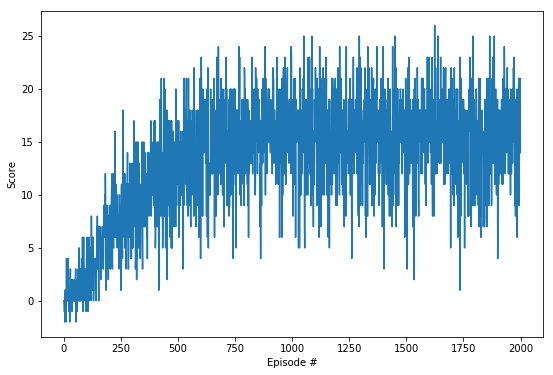

In [6]:
# plot the scores
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [8]:
env.close()